In [21]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

%matplotlib inline

In [6]:
data = sio.loadmat('ex6data1.mat')

In [12]:
X = data['X']
y = data['y'].reshape(1, -1)[0]

### Funções de plot

In [23]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


### Figura com o conjunto de dados

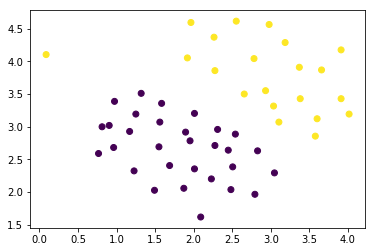

In [17]:
plt.scatter(X[:,0], X[:, 1], c=y)

### SVM com C=1

In [22]:
linearSVM = SVC(kernel='linear', C=1)
linearSVM.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

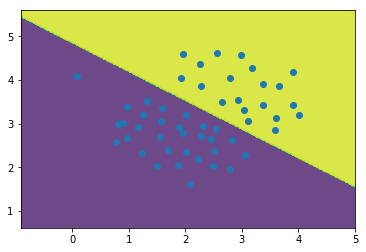

In [25]:
xx, yy = make_meshgrid(X[:,0], X[:, 1])

fig, ax = plt.subplots()
plot_contours(ax, linearSVM, xx, yy, cmpa=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:, 1])